In [4]:
import os,sys

if not os.path.exists("results/"):
    os.mkdir("results/")
results_dir = os.path.expanduser("results/")
#from utils import save_results
def save_results(results_dir, prefix, accuracy, labels, preds, feats=None):
    import numpy as np
    
    np.save(results_dir + "/" + prefix + "_accuracy.npy", accuracy)
    np.save(results_dir + "/" + prefix + "_labels.npy", labels)
    np.save(results_dir + "/" + prefix + "_preds.npy", preds)
    if feats is not None:
        np.save(results_dir + "/" + prefix + "_feats.npy", feats)
        

In [ ]:
save_results(results_dir, 't', accuracy, test_labels, preds_test)
save_results(results_dir, 'ft', accuracy_ft, test_labels_ft, preds_test_ft)

In [6]:
# imported from utils 
# utils.py: https://github.com/nhanvtran/MachineLearningNotebooks/blob/nvt/bwcustomweights-validate/project-brainwave/utils.py

%matplotlib inline


#from utils import plot_results
def plot_results(results_dir,plot_label='ROC.pdf'):
    import os
    import numpy as np
    from sklearn import metrics

    # Load the labels and results into memory.
    accuracy_t     = np.load(results_dir + "/t_accuracy.npy")
    test_labels_t  = np.load(results_dir + "/t_labels.npy")
    test_preds_t   = np.load(results_dir +"/t_preds.npy")
    #accuracy_q     = np.load(results_dir + "/q_accuracy.npy")
    #test_labels_q  = np.load(results_dir + "/q_labels.npy")
    #test_preds_q   = np.load(results_dir + "/q_preds.npy")
    accuracy_ft     = np.load(results_dir + "/ft_accuracy.npy")
    test_labels_ft = np.load(results_dir + "/ft_labels.npy")
    test_preds_ft  = np.load(results_dir + "/ft_preds.npy")
    #accuracy_b     = np.load(results_dir + "/b_accuracy.npy")
    #test_labels_b = np.load(results_dir + "/b_labels.npy")
    #test_preds_b  = np.load(results_dir + "/b_preds.npy")

    new_test_preds_t = np.zeros(test_preds_t.shape)
    new_test_preds_t[:,0] = test_preds_t[:,0]/np.sum(test_preds_t,axis=1)
    new_test_preds_t[:,1] = test_preds_t[:,1]/np.sum(test_preds_t,axis=1)
    test_preds_t = new_test_preds_t

    #new_test_preds_q = np.zeros(test_preds_q.shape)
    #new_test_preds_q[:,0] = test_preds_q[:,0]/np.sum(test_preds_q,axis=1)
    #new_test_preds_q[:,1] = test_preds_q[:,1]/np.sum(test_preds_q,axis=1)
    #test_preds_q = new_test_preds_q

    new_test_preds_ft = np.zeros(test_preds_ft.shape)
    new_test_preds_ft[:,0] = test_preds_ft[:,0]/np.sum(test_preds_ft,axis=1)
    new_test_preds_ft[:,1] = test_preds_ft[:,1]/np.sum(test_preds_ft,axis=1)
    test_preds_ft = new_test_preds_ft

    #new_test_preds_b = np.zeros(test_preds_b.shape)
    #new_test_preds_b[:,0] = test_preds_b[:,0]/np.sum(test_preds_b,axis=1)
    #new_test_preds_b[:,1] = test_preds_b[:,1]/np.sum(test_preds_b,axis=1)
    #test_preds_b = new_test_preds_b
    
    # Determine the ROC curve for each of the tests. 
    # [:,0] will convert the labels from one-hot to binary.
    fpr_test_t, tpr_test_t, thresholds      = metrics.roc_curve(test_labels_t[:,0],  test_preds_t[:,0])
    #fpr_test_q, tpr_test_q, thresholds_q    = metrics.roc_curve(test_labels_q[:,0],  test_preds_q[:,0])
    fpr_test_ft, tpr_test_ft, thresholds_ft    = metrics.roc_curve(test_labels_ft[:,0],  test_preds_ft[:,0])
    #fpr_test_b, tpr_test_b, thresholds_b    = metrics.roc_curve(test_labels_b[:,0],  test_preds_b[:,0])
    
    # Use the data we just generated to determine the area under the ROC curve.
    # Use the data we just generated to determine the area under the ROC curve.
    auc_test_t    = metrics.auc(fpr_test_t, tpr_test_t)
    #auc_test_q  = metrics.auc(fpr_test_q, tpr_test_q)
    auc_test_ft  = metrics.auc(fpr_test_ft, tpr_test_ft)
    #auc_test_b  = metrics.auc(fpr_test_b, tpr_test_b)
    
    # Find the true positive rate of 30% and 1 over the false positive rate at tpr = 30%.
    def find_nearest(array,value):
        idx = (np.abs(array-value)).argmin()
        return idx

    idx_t    = find_nearest(tpr_test_t,0.3)
    #idx_q    = find_nearest(tpr_test_q,0.3)
    idx_ft   = find_nearest(tpr_test_ft,0.3)
    #idx_b    = find_nearest(tpr_test_b,0.3)
    
    # Plot the ROCs, labeling with the AUCs.
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7,5))
    plt.plot(tpr_test_t, fpr_test_t, label=r'Floating point:  acc. = %.1f%%, AUC = %.1f%%, $1/\epsilon_{B}$ = %.0f'%(accuracy_t*100, auc_test_t*100., 1./fpr_test_t[idx_t]))
    #plt.plot(tpr_test_q, fpr_test_q, linestyle='--', label=r'Quant.: AUC = %.1f%%, acc. = %.1f%%, $1/\epsilon_{B}$ = %.0f'%(auc_test_q*100., accuracy_q*100, 1./fpr_test_q[idx_q]))
    plt.plot(tpr_test_ft, fpr_test_ft, linestyle='-.', label=r'Quant., fine-tune: acc. = %.1f%%, AUC = %.1f%%, $1/\epsilon_{B}$ = %.0f'%(accuracy_ft*100, auc_test_ft*100.,  1./fpr_test_ft[idx_ft]))
    #plt.plot(tpr_test_b, fpr_test_b, linestyle=':',label=r'Brainwave: AUC = %.1f%%, acc. = %.1f%%, $1/\epsilon_{B}$ = %.0f'%(auc_test_b*100., accuracy_b*100, 1./fpr_test_b[idx_b]))
    plt.semilogy()
    plt.xlabel("Signal efficiency",fontsize='x-large')
    plt.ylabel("Background efficiency",fontsize='x-large')
    plt.ylim(0.0001,1)
    plt.xlim(0,1)
    plt.grid(True)
    plt.legend(loc='upper left',fontsize=11.8)
    plt.tight_layout()
    plt.savefig(results_dir+'/'+plot_label)    
    #plt.figure()
    #plt.hist(test_preds_t[:,0], weights=test_labels_t[:,0], bins=np.linspace(0, 1, 40), density=True, alpha = 0.7)
    #plt.hist(test_preds_t[:,0], weights=test_labels_t[:,1], bins=np.linspace(0, 1, 40), density=True, alpha = 0.7)
    #plt.hist(test_preds_q[:,0], weights=test_labels_q[:,0], bins=np.linspace(0, 1, 40), density=True, alpha = 0.7)
    #plt.hist(test_preds_q[:,0], weights=test_labels_q[:,1], bins=np.linspace(0, 1, 40), density=True, alpha = 0.7)
    #plt.hist(test_preds_ft[:,0], weights=test_labels_ft[:,0], bins=np.linspace(0, 1, 40), density=True, alpha = 0.7)
    #plt.hist(test_preds_ft[:,0], weights=test_labels_ft[:,1], bins=np.linspace(0, 1, 40), density=True, alpha = 0.7)
    #plt.hist(test_preds_b[:,0], weights=test_labels_b[:,0], bins=np.linspace(0, 1, 40), density=True, alpha = 0.7)
    #plt.hist(test_preds_b[:,0], weights=test_labels_b[:,1], bins=np.linspace(0, 1, 40), density=True, alpha = 0.7)

    #print ("Floating Point", accuracy_t, auc_test_t, tpr_test_t[idx_t], 1./fpr_test_t[idx_t])
    #print ("Quantized     ", accuracy_q, auc_test_q, tpr_test_q[idx_q], 1./fpr_test_q[idx_q])
    print ("Quantized, fine-tuned", accuracy_ft, auc_test_ft, tpr_test_ft[idx_ft], 1./fpr_test_ft[idx_ft])
    #print ("Brainwave", accuracy_b, auc_test_b, tpr_test_b[idx_b], 1./fpr_test_b[idx_b])
    

Quantized, fine-tuned 0.9324000000000005 0.9819779463542667 0.30101626016260163 1693.3333333333333


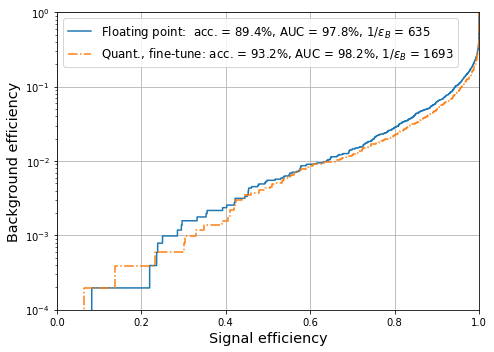

In [7]:
plot_results(results_dir)